# **EJERCICIO DE APLICACIÓN: ENFERMEDAD DE PARKINSON**

# Primer ejercicio modulo de retos meIA

In [1]:
import importlib
import subprocess
import sys

def instalar_si_no(paquete, nombre_import=None):
    if nombre_import is None:
        nombre_import = paquete
    try:
        importlib.import_module(nombre_import)
        print(f"{paquete} ya está instalado.")
    except ImportError:
        print(f"{paquete} no encontrado. Instalando...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])

# Lista de paquetes a comprobar
instalar_si_no("numpy")
instalar_si_no("pandas")
instalar_si_no("matplotlib")
instalar_si_no("seaborn")
instalar_si_no("scikit-learn", "sklearn")


numpy ya está instalado.
pandas ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.
scikit-learn ya está instalado.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importando el dataset
df = pd.read_csv('pd_speech_features.csv')


In [4]:
df.head(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [5]:
df.tail(5)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0
755,251,0,0.81304,0.76471,0.46374,340,339,0.005676,0.000037,0.00078,...,62.9927,21.8152,9.2457,4.8555,3.0551,3.0415,4.0116,2.6217,3.1527,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [7]:
conte_clases = df['class'].value_counts()
print(conte_clases)

class
1    564
0    192
Name: count, dtype: int64


**Verificación de dataset balanceado**

class
1    564
0    192
Name: count, dtype: int64


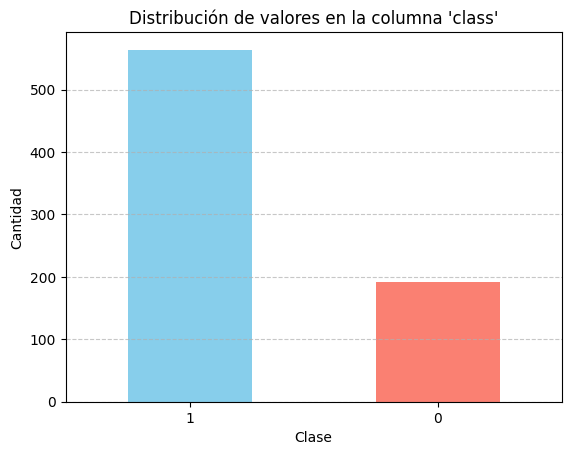

In [8]:
conteo_class = df["class"].value_counts()
print(conteo_class)

conteo_class.plot(kind='bar', color=['skyblue', 'salmon', 'yellow'])
plt.title("Distribución de valores en la columna 'class'")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
C_1 = 147  # Clase 1
C_2 = 48  # Clase 2
c = C_2 + C_1
C_1 = (C_1*100)/(c)
C_2 = (C_2*100)/(c)

print(C_1)
print(C_2)

75.38461538461539
24.615384615384617


**Datos inconsistentes**

In [10]:
def datos_nulos():
  print("Valores nullos: ")
  columnas = df.columns.values.tolist()
  for c, i in enumerate(columnas):
    p = columnas[c]
    v = pd.isna(df[columnas[c]]).sum()
    print(f"{p}: {v}")
datos_nulos()

Valores nullos: 
id: 0
gender: 0
PPE: 0
DFA: 0
RPDE: 0
numPulses: 0
numPeriodsPulses: 0
meanPeriodPulses: 0
stdDevPeriodPulses: 0
locPctJitter: 0
locAbsJitter: 0
rapJitter: 0
ppq5Jitter: 0
ddpJitter: 0
locShimmer: 0
locDbShimmer: 0
apq3Shimmer: 0
apq5Shimmer: 0
apq11Shimmer: 0
ddaShimmer: 0
meanAutoCorrHarmonicity: 0
meanNoiseToHarmHarmonicity: 0
meanHarmToNoiseHarmonicity: 0
minIntensity: 0
maxIntensity: 0
meanIntensity: 0
f1: 0
f2: 0
f3: 0
f4: 0
b1: 0
b2: 0
b3: 0
b4: 0
GQ_prc5_95: 0
GQ_std_cycle_open: 0
GQ_std_cycle_closed: 0
GNE_mean: 0
GNE_std: 0
GNE_SNR_TKEO: 0
GNE_SNR_SEO: 0
GNE_NSR_TKEO: 0
GNE_NSR_SEO: 0
VFER_mean: 0
VFER_std: 0
VFER_entropy: 0
VFER_SNR_TKEO: 0
VFER_SNR_SEO: 0
VFER_NSR_TKEO: 0
VFER_NSR_SEO: 0
IMF_SNR_SEO: 0
IMF_SNR_TKEO: 0
IMF_SNR_entropy: 0
IMF_NSR_SEO: 0
IMF_NSR_TKEO: 0
IMF_NSR_entropy: 0
mean_Log_energy: 0
mean_MFCC_0th_coef: 0
mean_MFCC_1st_coef: 0
mean_MFCC_2nd_coef: 0
mean_MFCC_3rd_coef: 0
mean_MFCC_4th_coef: 0
mean_MFCC_5th_coef: 0
mean_MFCC_6th_coef: 0
m

In [11]:
df_str = df.astype(str)
df_con_interrogacion = df[df_str.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

# Fila que NO contiene ningún "?" en ninguna celda
df_sin_interrogacion = df[~df_str.apply(lambda fila: fila.str.contains(r"\?").any(), axis=1)]

print(f"Filas con '?': {len(df_con_interrogacion)}")
print(f"Filas sin '?': {len(df_sin_interrogacion)}")

#df = df_str.infer_objects()

Filas con '?': 0
Filas sin '?': 756


In [12]:
# Verificar si hay al menos un NaN en el DataFrame
hay_nan = df.isnull().values.any()

print("¿Hay valores NaN?:", hay_nan)

if not hay_nan:
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)
    print("Se ha reordenado aleatoriamente el DataFrame.")
else:
    print("El DataFrame contiene valores NaN. No se reordenó.")

¿Hay valores NaN?: False
Se ha reordenado aleatoriamente el DataFrame.


---
---
---
**LEAVE ONE OUT**
---
---
---

## MLP

In [13]:
def entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes):
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, early_stopping=True, max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    # La especificidad no se calcula directamente con sklearn.metrics para MLP en un weighted average.
    # Necesitaríamos la matriz de confusión para calcularla manualmente si se requiere.
    # Para la tabla, la rellenamos con NaN si no se calcula.
    cm = confusion_matrix(y_test, y_pred)
    especificidad = np.nan # Por defecto
    if cm.shape[0] == 2: # Solo para clasificación binaria
        tn, fp, fn, tp = cm.ravel()
        especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0

    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "especificidad": especificidad # Añadir especificidad aquí
    }


## MLP Simple

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def entrenar_evaluar_mlps(X_train, y_train, X_test, y_test):

    mlp = MLPClassifier(hidden_layer_sizes=(10,),early_stopping=True, max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    resultados = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted'),
        "predicciones": y_pred
    }
    return resultados


## KNN

In [15]:
def entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test, y_pred_knn)

    # Calcular la precisión global
    accuracy_knn = np.trace(cm_knn) / cm_knn.sum() if cm_knn.sum() > 0 else 0

    # Calcular precisión, recall y especificidad por clase, luego promediar (weighted)
    precisions = []
    recalls = []
    specificities = []

    num_classes = cm_knn.shape[0]

    if num_classes == 0: # Caso donde no hay clases o datos
        return {
            "accuracy": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "especificidad": 0.0
        }

    for i in range(num_classes):
        tp = cm_knn[i, i]
        fp = cm_knn[:, i].sum() - tp
        fn = cm_knn[i, :].sum() - tp
        tn = cm_knn.sum() - (tp + fp + fn)

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0 # Verdaderos negativos / (Verdaderos negativos + Falsos positivos)

        precisions.append(precision)
        recalls.append(recall)
        specificities.append(specificity)

    # Calcular promedios ponderados si hay múltiples clases para las métricas
    if num_classes > 1:
        total_samples_per_class = cm_knn.sum(axis=1)
        total_samples = total_samples_per_class.sum()
        weights = total_samples_per_class / total_samples if total_samples > 0 else np.zeros(num_classes)

        weighted_precision = np.sum(np.array(precisions) * weights)
        weighted_recall = np.sum(np.array(recalls) * weights)
        weighted_specificity = np.sum(np.array(specificities) * weights)
    else: # Caso binario
        weighted_precision = precisions[0]
        weighted_recall = recalls[0]
        weighted_specificity = specificities[0]

    return {
        "accuracy": accuracy_knn,
        "precision": weighted_precision,
        "recall": weighted_recall,
        "especificidad": weighted_specificity
    }

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

features = [col for col in df.columns if col != 'class']
target = 'class'
num_repetitions = 30
resultados_totales = []

for rep in range(num_repetitions):
    df_shuffle = shuffle(df, random_state=rep)
    df_reset_index = df_shuffle.reset_index(drop=True)


    resultados_repeticion = {
        "MLP_Deep": [],
        "MLP_Simple": [],
        "KNN_k3": [],
        "KNN_k5": [],
        "KNN_k27": []
    }

    print(f"Calculando repetición {rep + 1}/{num_repetitions}...")
    for i in range(len(df_reset_index)):
        test = df_reset_index.iloc[[i]]
        train = df_reset_index.drop(index=i)

        X_train = train[features].values
        y_train = train[target].values
        X_test = test[features].values
        y_test = test[target].values[0]

        if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
            y_test = y_test.values.flatten()
        else:
            y_test = np.array([y_test])

        # DEEP LEARNING
        res_mlp_deep = entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10, 3))
        resultados_repeticion["MLP_Deep"].append(res_mlp_deep)

        # MLP
        res_mlp_simple = entrenar_evaluar_mlp(X_train, y_train, X_test, y_test, hidden_layer_sizes=(10,))
        resultados_repeticion["MLP_Simple"].append(res_mlp_simple)

        # KNN k=3
        res_knn_k3 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=3)
        resultados_repeticion["KNN_k3"].append(res_knn_k3)

        # KNN k=5
        res_knn_k5 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=5)
        resultados_repeticion["KNN_k5"].append(res_knn_k5)

        # KNN k=27
        res_knn_k27 = entrenar_evaluar_knn(X_train, y_train, X_test, y_test, k=27)
        resultados_repeticion["KNN_k27"].append(res_knn_k27)

      # MEDIA PARA LLeNAR LA TABLA
    for model_name, results_list in resultados_repeticion.items():
        if results_list:
            accuracy = np.mean([r['accuracy'] for r in results_list])
            recall = np.mean([r['recall'] for r in results_list])
            precision = np.mean([r['precision'] for r in results_list])
            especificidad = np.nanmean([r['especificidad'] for r in results_list])

            resultados_totales.append({
                "repeticion_id": rep + 1,
                "modelo": model_name,
                "accuracy": accuracy,
                "recall": recall,
                "precision": precision,
                "especificidad": especificidad
            })

Calculando repetición 1/30...
Calculando repetición 2/30...
Calculando repetición 3/30...
Calculando repetición 4/30...
Calculando repetición 5/30...
Calculando repetición 6/30...
Calculando repetición 7/30...
Calculando repetición 8/30...
Calculando repetición 9/30...
Calculando repetición 10/30...
Calculando repetición 11/30...
Calculando repetición 12/30...
Calculando repetición 13/30...
Calculando repetición 14/30...
Calculando repetición 15/30...
Calculando repetición 16/30...
Calculando repetición 17/30...
Calculando repetición 18/30...
Calculando repetición 19/30...
Calculando repetición 20/30...
Calculando repetición 21/30...
Calculando repetición 22/30...
Calculando repetición 23/30...
Calculando repetición 24/30...
Calculando repetición 25/30...
Calculando repetición 26/30...
Calculando repetición 27/30...
Calculando repetición 28/30...
Calculando repetición 29/30...
Calculando repetición 30/30...


In [17]:
df_resultados = pd.DataFrame(resultados_totales)
print("\nResultados Promedio de Leave-One-Out por Cada Repetición ")
print(df_resultados)


Resultados Promedio de Leave-One-Out por Cada Repetición 
     repeticion_id      modelo  accuracy    recall  precision  especificidad
0                1    MLP_Deep  0.746032  0.746032   0.746032            0.0
1                1  MLP_Simple  0.742063  0.742063   0.742063            0.0
2                1      KNN_k3  0.716931  0.716931   0.716931            0.0
3                1      KNN_k5  0.722222  0.722222   0.722222            0.0
4                1     KNN_k27  0.748677  0.748677   0.748677            0.0
..             ...         ...       ...       ...        ...            ...
145             30    MLP_Deep  0.746032  0.746032   0.746032            0.0
146             30  MLP_Simple  0.746032  0.746032   0.746032            0.0
147             30      KNN_k3  0.716931  0.716931   0.716931            0.0
148             30      KNN_k5  0.722222  0.722222   0.722222            0.0
149             30     KNN_k27  0.748677  0.748677   0.748677            0.0

[150 rows x 6 co

In [18]:
df_resultados.head(10)

,repeticion_id,modelo,accuracy,recall,precision,especificidad
0,1,MLP_Deep,0.746032,0.746032,0.746032,0.0
1,1,MLP_Simple,0.742063,0.742063,0.742063,0.0
2,1,KNN_k3,0.716931,0.716931,0.716931,0.0
3,1,KNN_k5,0.722222,0.722222,0.722222,0.0
4,1,KNN_k27,0.748677,0.748677,0.748677,0.0
5,2,MLP_Deep,0.746032,0.746032,0.746032,0.0
6,2,MLP_Simple,0.747354,0.747354,0.747354,0.0
7,2,KNN_k3,0.716931,0.716931,0.716931,0.0
8,2,KNN_k5,0.722222,0.722222,0.722222,0.0
9,2,KNN_k27,0.748677,0.748677,0.748677,0.0


In [19]:
conte_clases = df_resultados['recall'].value_counts()
print(conte_clases)

recall
0.746032    48
0.716931    30
0.748677    30
0.722222    30
0.747354     5
0.740741     3
0.742063     1
0.750000     1
0.738095     1
0.736772     1
Name: count, dtype: int64


In [20]:
df_resultados.to_csv('resultados_leave_one_out_ej3.csv', index=False)